<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_classification_LogisticLinear_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
pip install numpy --upgrade

     |████████████████████████████████| 15.7 MB 33.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [117]:
base = pd.read_csv('/content/salaries.csv')

In [118]:
base.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [119]:
base.tail()

,company,job,degree,salary_more_then_100k
24,google,sales executive,masters,0
25,facebook,business manager,bachelors,1
26,facebook,business manager,bachelors,1
27,abc pharma,computer programmer,bachelors,0
28,abc pharma,computer programmer,bachelors,0


In [120]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                29 non-null     object
 1   job                    29 non-null     object
 2   degree                 29 non-null     object
 3   salary_more_then_100k  29 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [121]:
base.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [122]:
base.mean()

salary_more_then_100k    0.448276
dtype: float64

In [123]:
x_base = base.iloc[:,0:3].values
y_base = base.iloc[:,3].values

In [124]:
type(x_base), type(y_base)

(numpy.ndarray, numpy.ndarray)

In [125]:
x_base.shape

(29, 3)

In [126]:
y_base.shape

(29,)

In [127]:
np.unique(base['salary_more_then_100k'], return_counts = True)

(array([0, 1]), array([16, 13]))

16 pessoas tem salario acima de 100 K e 13 pessoas não

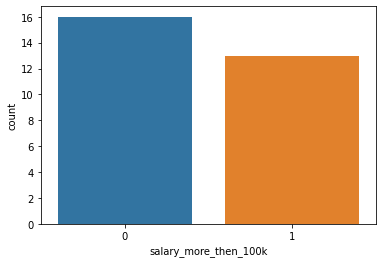

In [128]:
sns.countplot(x = base['salary_more_then_100k']);

(0) representa salario maior que 100 k e (1) quem ganha menos que 100k

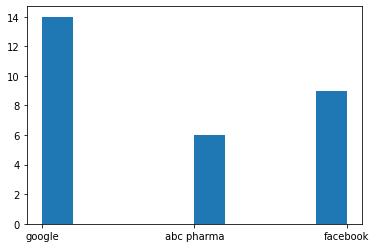

In [129]:
plt.hist( x = base['company']);

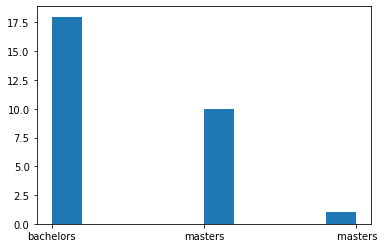

In [130]:
plt.hist( x = base['degree']);

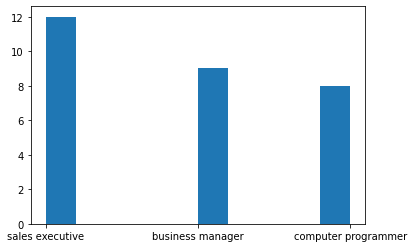

In [131]:
plt.hist( x = base['job']);

In [132]:
base.describe()

,salary_more_then_100k
count,29.000000
mean,0.448276
std,0.506120
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [165]:
from sklearn.model_selection import train_test_split

In [166]:
x_base_train, x_base_test, y_base_train, y_base_test = train_test_split(x_base, y_base, test_size=0.35, random_state=0)

In [135]:
type(x_base_train), type(y_base_train)

(numpy.ndarray, numpy.ndarray)

In [136]:
type(x_base_test), type(y_base_test)

(numpy.ndarray, numpy.ndarray)

In [167]:
x_base_train.shape

(18, 3)

In [168]:
y_base_train.shape

(18,)

In [169]:
x_base_test.shape

(11, 3)

In [170]:
y_base_test.shape

(11,)

vamos padronizar

In [154]:
#TRATAMENTO DE ATRIBUTOS CATEGORICOS

#LabelEncoder  === #tranf dados categoricos strings em numericos

from sklearn.preprocessing import LabelEncoder

In [155]:
label_encoder_teste = LabelEncoder()

In [162]:
x_base[0], x_base[1], x_base[2]

(array([ 0.92447345,  1.06144556, -0.58338335]),
 array([0.92447345, 1.06144556, 1.29640745]),
 array([ 0.92447345, -1.30639453, -0.58338335]))

In [156]:
label_encoder_company = LabelEncoder()
label_encoder_degree = LabelEncoder()
label_encoder_job = LabelEncoder()

In [157]:
x_base[:,0] = label_encoder_company.fit_transform(x_base[:,0])
x_base[:,1] = label_encoder_degree.fit_transform(x_base[:,1])
x_base[:,2] = label_encoder_job.fit_transform(x_base[:,2])

In [181]:
#ESCALONAMENTO DOS VALORES   para deixar tudo na mesma escala

from sklearn.preprocessing import StandardScaler
scaler_base = StandardScaler()
x_base = scaler_base.fit_transform(x_base) #depois que rodo aqui, tenho que rodar o treino e teste lá em cima novamente

vamos aplicar ao modelo o algoritimo de Regressao Logistica

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
Regressao = LogisticRegression()

In [148]:
type(Regressao)

sklearn.linear_model._logistic.LogisticRegression

Previsão do modelo e comparativo com o real

In [173]:
Regressao.fit(x_base_train, y_base_train)
previsao = Regressao.predict(x_base_test)
previsao

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [164]:
y_base_test

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(y_base_test, previsao)

0.7272727272727273

Portanto temos uma acurácia de 72 %, é uma acurácia aceitável, mas podemos melhorar ela usando outros algoritimos e principalmente coletando mais informações no dataset, para assim nosso modelo evitar sofrer overfitting